## Titanic Exploratory Data Analysis: 
In this document we perform the Exploratory Data Analysis (EDA) for the Titanic Dataset, within this document we will analysis the distribution of variables, their relationship and which variables should be important for the model creation.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re 
import os

In [2]:
train_path = os.path.join("Data", "train.csv")
test_path = os.path.join("Data", "test.csv")

In [3]:
train_df = pd.read_csv(train_path)
test_df = pd.read_csv(test_path)

# Initial Visualization of Data:
For starters we are going to analyze the data structure of the dataset, we are going to see how much null valued rows we have and if any features need any type of treatment due to missing data. 

In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB



<ul>
  <li>
    The <strong>cabin</strong> feature given in the dataset has approximately 600 rows with missing values. This means that nearly 80% of all rows in this feature are missing.
  </li>
  <li>
    <strong>Age</strong> has 177 rows with missing values, which constitutes approximately 21% of the rows.
  </li>
  <li>
    The <strong>Embarked</strong> feature is missing in 2 rows, which means that 0.22% of the rows are missing in the dataset.
  </li>
</ul>

Throughout this Jupyter notebook, we will handle these missing data so that they do not affect the prediction model.

In [5]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Important Initial Questions: 
Some important Questions we want to ask ourselfs about the data are the following: 
1. Are Lonely passengers prone to survival during the Titanic incident?
2. Is Marriage an important feature to take into account?
3. How is Survival rates distributed between Ages? and between Adults and children?
4. What features are more correlated to survival?

As you can see here, the data of Ticket, Name, Sex, Cabin, Embarked are all in string format. This is troublesome for models to interpret upon. We are going to analyze this data in order to transform it into numerical format. 
## Name Feature Engineering:
First we will start with the name, as you can see the name in this dataset has an specific structure assigned to it, as you can see the last name of the person is given first, then the title and at last First name. In some cases, people have parenthesis in their names, which means the name before being married. As you can see here the name column of the dataset has abundant information about the people in the titanic. In order to structure the provided information here we give a summary of the structures: 
<ol>
  <li>
    <strong>LastName</strong>: This represents the last name or surname of the passenger, which comes first in the name structure.
  </li>
  <li>
    <strong>Title</strong>: The title component includes honorific titles such as Mr., Mrs., Miss., Master., etc., which provide information about the gender and marital status of the passenger.
  </li>
  <li>
    <strong>FirstName</strong>: This is the first name or given name of the passenger, which appears after the title. For example, "John" or "Mary".
  </li>
  <li>
    <strong>MaidenName</strong>: For married women, the maiden name may be included in parentheses after the first name. It indicates the woman's family name before marriage. 
  </li>
</ol>

We will divide the name into the following generated features:
<ol>
  <li>
    <strong>familyId</strong>: This will give us the Last name for the passenger and its ticket, which will work as an family identifier, as tickets for families is the same.
  </li>
  <li>
    <strong>isMarried</strong>: This column will provide boolean information if the passenger was in fact married or not, for woman this feature is direct as the parenthesis tell us the person is married.
  </li>
  <li>
    <strong>isAdult</strong>: This column will provide boolean information if the passenger was an adult or a children, given the name title: Mr, Mrs for adults and Master or Miss for children. 
  </li>
</ol>

In [6]:
# generate new column called LastName:
train_df["familyId"] = train_df.apply(lambda x: str((x["Name"].split(",")[0], x["Ticket"])), axis=1)

In [7]:
def get_pattern(x, pattern="(?<= )[A-Za-z]*(?=[)])", default_attr="marriedLastName", default_value=None, boolean=False): 
    search = re.search(pattern, x["Name"])
    if default_value is None and default_attr is None: 
        raise ValueError("Both Default values are None, you must at least provide one.")
    if search: 
        returned_pattern =  search.group(0)
        if boolean: 
            return 1
        else: 
            return returned_pattern
    else: 
        if boolean: 
            return 0
        else: 
            if default_attr: 
                return getattr(x, default_attr)
            else: 
                return default_value
# train_df["singleLastName"] = train_df.apply(lambda x: single_last_name(x), axis=1)

In [8]:
train_df["isAdult"] = train_df.apply(lambda x: int(get_pattern(x, pattern= "(?<= )Mr|Mrs(?=[.])", boolean=True) or x["Age"]>=18), axis=1)

In [9]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyId,isAdult
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,"('Braund', 'A/5 21171')",1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"('Cumings', 'PC 17599')",1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"('Heikkinen', 'STON/O2. 3101282')",1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"('Futrelle', '113803')",1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,"('Allen', '373450')",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,"('Montvila', '211536')",1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"('Graham', '112053')",1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,"('Johnston', 'W./C. 6607')",0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,"('Behr', '111369')",1


In [10]:
train_df["isMarried"] = train_df.apply(lambda x: int("(" in x["Name"]), axis=1)

As we can see the new dataframe lets us use the Name attribute in order to get if the person is married or not (just for women) and lets us know the family relationships between Passengers due to its LastName. 

In [11]:
train_df[train_df["Sex"]=="female"]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,familyId,isAdult,isMarried
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,"('Cumings', 'PC 17599')",1,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,"('Heikkinen', 'STON/O2. 3101282')",1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,"('Futrelle', '113803')",1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,"('Johnson', '347742')",1,1
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,"('Nasser', '237736')",1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
880,881,1,2,"Shelley, Mrs. William (Imanita Parrish Hall)",female,25.0,0,1,230433,26.0000,NaN,S,"('Shelley', '230433')",1,1
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,"('Dahlberg', '7552')",1,0
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,"('Rice', '382652')",1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,"('Graham', '112053')",1,0


Now we will fix the married column for men, in order to do this we will look for the family name and check if there are two adults and check if the female adult is married, in that case the man is also married, in cases where the wife is not in the ship we cannot tell directly if the man was in fact married. 

In [12]:
# groupping by the family name: 
LastNameGroups = train_df.groupby(["familyId"])

In [13]:
def is_this_man_married(passenger, grouped_families_list):
    grouped_families_list =grouped_families_list[grouped_families_list["PassengerId"]!=passenger["PassengerId"]]
    has_wife = np.logical_and(grouped_families_list["isAdult"],\
                             (grouped_families_list["Sex"]=="female"),
                            grouped_families_list["isMarried"])
    justSp = passenger["SibSp"]==1
    return any(has_wife)*justSp

In [14]:
married_candidates = train_df[(train_df["Sex"]=="male") & (train_df["isAdult"])]

In [15]:
married_candidates.familyId

0               ('Braund', 'A/5 21171')
4                   ('Allen', '373450')
5                   ('Moran', '330877')
6                 ('McCarthy', '17463')
12         ('Saundercock', 'A/5. 2151')
                     ...               
883    ('Banfield', 'C.A./SOTON 34068')
884     ('Sutehall', 'SOTON/OQ 392076')
886              ('Montvila', '211536')
889                  ('Behr', '111369')
890                ('Dooley', '370376')
Name: familyId, Length: 536, dtype: object

In [16]:
are_married = married_candidates.apply(lambda x: is_this_man_married(x, train_df.iloc[list(LastNameGroups.groups[x["familyId"]])]),axis=1)

In [17]:
train_df.loc[married_candidates.index, "isMarried"]= are_married

# Managing Age:
As you can see with the previous analysis we could find out if passengers were married or not, also using age as the only indicative if someone is or not young enough to be a priority in scape boats is not enough. As a person very young could be a father or be married. Even using the convention of ">18" and "<18" as the only indicative of youth is a cultural definition that does not correspond necessarily with the times the Titanic sank. This is why in order to handle the missing values in the Titanic dataset we will use the mean to fill this values but the mean regarding if the Passenger was or not an adult. 

In [18]:
adult_age_mean = train_df[train_df["isAdult"]==1]["Age"].mean()
children_age_mean = train_df[train_df["isAdult"]==0]["Age"].mean()
train_df.loc[(train_df["isAdult"]==1) & (train_df["Age"].isna()), "Age"]= adult_age_mean
train_df.loc[(train_df["isAdult"]==0) & (train_df["Age"].isna()), "Age"] = children_age_mean

# Handling Cabin Missing Data: 
As Cabin feature is missing on approximately 80% of the rows, there has to be a way to handle this issue. This is why we will drop the feature in order to just feed our model data that we are sure will most probably will be in the given information.

In [19]:
train_df.drop(columns=["Cabin"], inplace=True)

## Handling Embarked_missing Data:
As the Embarked variable has only 0.22% value of the whole dataset missing we will drop those rows in order to have only existent embarked features. 

In [20]:
embarked_index = train_df[train_df["Embarked"].isna()].index
train_df.drop(index= embarked_index, inplace=True)

# Feature Engineering:  
In order to provide the model with more important and relevant information we want to generate some basic characteristics that will supply important information to the model.
This features will be family Size and if the person was or not alone. 

In [21]:
# setting the family Size
train_df["familySize"] = train_df.apply(lambda x: x["SibSp"]+x["Parch"]+1, axis=1)
# setting the isAlone: 
train_df["isAlone"] = train_df.apply(lambda x: int(x["familySize"]==1), axis=1)

In [22]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,familyId,isAdult,isMarried,familySize,isAlone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.000000,1,0,A/5 21171,7.2500,S,"('Braund', 'A/5 21171')",1,0,2,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.000000,1,0,PC 17599,71.2833,C,"('Cumings', 'PC 17599')",1,1,2,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.000000,0,0,STON/O2. 3101282,7.9250,S,"('Heikkinen', 'STON/O2. 3101282')",1,0,1,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.000000,1,0,113803,53.1000,S,"('Futrelle', '113803')",1,1,2,0
4,5,0,3,"Allen, Mr. William Henry",male,35.000000,0,0,373450,8.0500,S,"('Allen', '373450')",1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.000000,0,0,211536,13.0000,S,"('Montvila', '211536')",1,0,1,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.000000,0,0,112053,30.0000,S,"('Graham', '112053')",1,0,1,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,7.007701,1,2,W./C. 6607,23.4500,S,"('Johnston', 'W./C. 6607')",0,0,4,0
889,890,1,1,"Behr, Mr. Karl Howell",male,26.000000,0,0,111369,30.0000,C,"('Behr', '111369')",1,0,1,1


# Transform Strings to Categorical:
In order to only have numerical features generated for this dataset, we need to transform some string variables into categorical values and drop other columns from the dataset. Specifically we will transform the columns: Sex, Embarked into categorical values that will later help us find the best suited features for model development. The features we will drop from the dataset are familyId (it has already meet its purpose), Name (we already extracted all the necessary information), Ticket (same reason as familyId), one could speculate that knowing the family could tell us a lot about what happened, but the important information was generated through marriage, family size, isAdult and isAlone. With only this features we could understand the general patterns found in data.    

In [23]:
train_df["Embarked"].unique()

array(['S', 'C', 'Q'], dtype=object)

In [24]:
from sklearn import preprocessing

Embarked_label_encoder = preprocessing.LabelEncoder()
Embarked_label_encoder.fit(["C", "Q", "S"])
train_df["Embarked"] = Embarked_label_encoder.transform(train_df["Embarked"])

In [25]:
from sklearn import preprocessing
sex_label_binarizer = preprocessing.LabelEncoder()
sex_label_binarizer.fit(["male", "female"])
train_df["Sex"] = sex_label_binarizer.transform(train_df["Sex"])

## dropping un needed data:  


In [26]:
train_df.drop(columns=["Name", "familyId", "Ticket"], inplace=True)

In [27]:
train_df.set_index("PassengerId", inplace=True)

In [28]:
def plot_correlation_matrix(df):
    corr_matrix = df.corr()
    labels = df.columns
    # generate the upper triangle mask:
    mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
    # generate the figure
    fig, ax = plt.subplots(figsize=(11,9))
    # set the colors
    cmap = sns.diverging_palette(230, 20, as_cmap=True)
    # generamos el mapa de calor con la matriz de correlacion
    sns.heatmap(corr_matrix, mask=mask, cmap=cmap, vmax=.3, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5}, xticklabels=labels, yticklabels=labels)
    ax.set_title("Label Correlation Matrix")

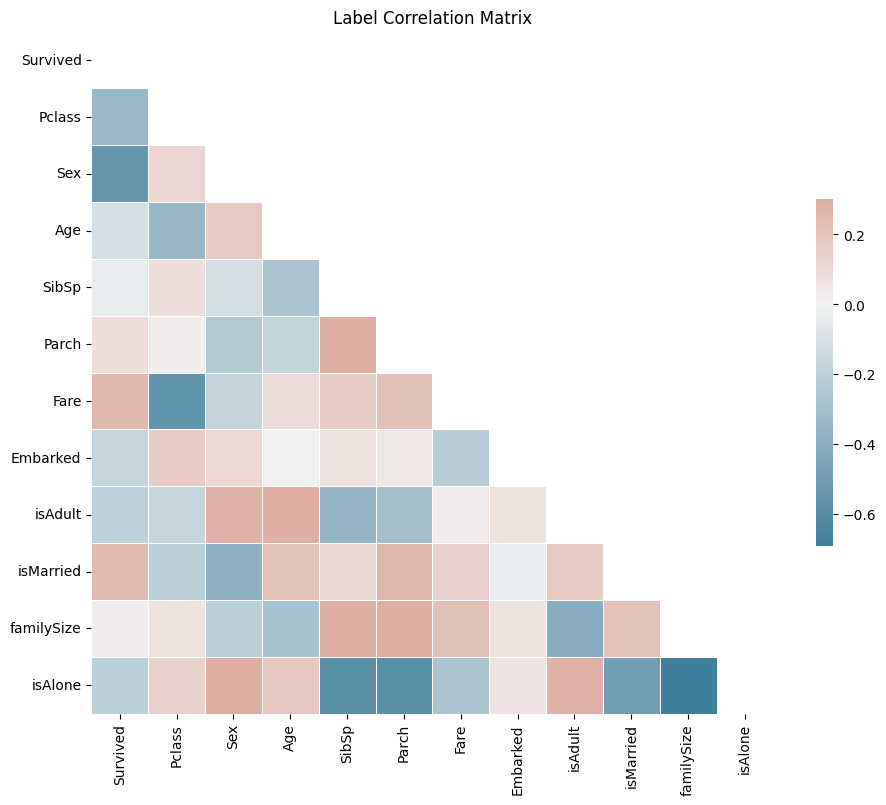

In [29]:
plot_correlation_matrix(train_df)

# Coordinate Plot: 
In order to analyze if there are any patterns in data we are going to normalize the data in another dataframe so we can see how data patterns distribute. 

In [30]:
normalized_data = train_df.copy()
standard_scaler = preprocessing.MinMaxScaler()
standard_scaler.fit(train_df)
normalized_data = pd.DataFrame(standard_scaler.transform(train_df), columns=train_df.columns, index=train_df.index)


In [31]:
normalized_data["Survived"] = train_df["Survived"]

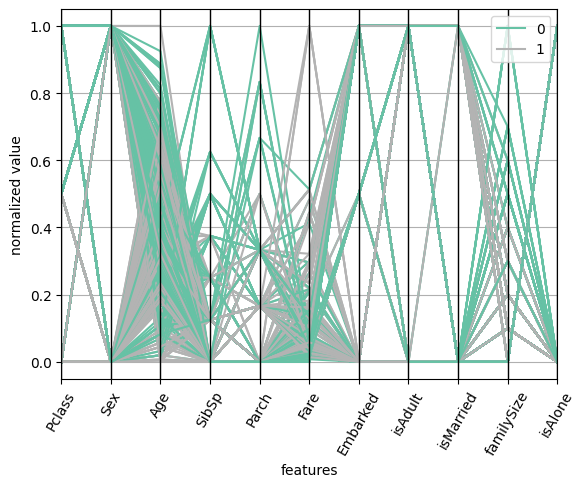

In [32]:
import pandas
from pandas.plotting import parallel_coordinates

parallel_coordinates(normalized_data, 'Survived', colormap=plt.get_cmap("Set2"))
plt.xticks(rotation=60)
plt.xlabel("features")
plt.ylabel("normalized value")
plt.show()

# Survived and not Survived Distribution: 


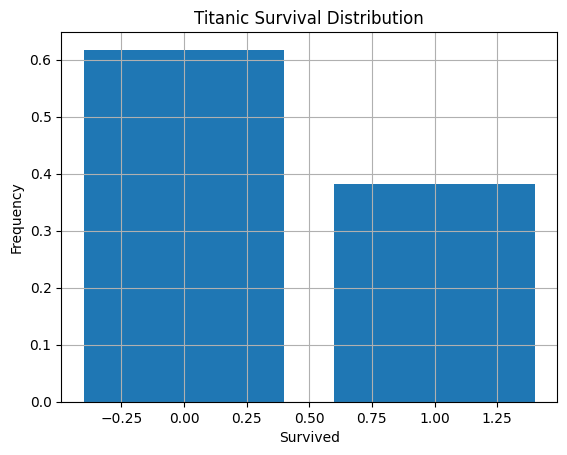

In [33]:
label_counts = train_df["Survived"].value_counts()
plt.bar(label_counts.index, label_counts.values/len(train_df))
plt.xlabel("Survived")
plt.ylabel("Frequency")
plt.title("Titanic Survival Distribution")
plt.grid()
plt.show()

In [39]:
def eliminate_specific_data( X, y):
        embarked_index = X[X["Embarked"].isna()].index
        X.drop(index= embarked_index, inplace=True)
        y.drop(index=embarked_index, inplace=True)
        return X, y

In [40]:
from sklearn.model_selection import train_test_split
y = train_df["Survived"]
X = train_df.drop(columns=["Survived"])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(
                                        X, y, test_size=0.33, random_state=42)
X_train, y_train =eliminate_specific_data(X_train, y_train)
X_test, y_test = eliminate_specific_data(X_test, y_test)

In [44]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train, y_train)


RandomForestClassifier()

In [45]:
from sklearn.metrics import accuracy_score, recall_score, f1_score
metrics = [("accuracy", accuracy_score), ("recall", recall_score), ("F1Score", f1_score)]

In [46]:
results = {}
predict = clf.predict(X_test)
for metric_name, a_metric in metrics:
    results[metric_name]= a_metric(y_test, predict)

In [47]:
print(results)

{'accuracy': 0.7891156462585034, 'recall': 0.7363636363636363, 'F1Score': 0.7232142857142857}
